The aim of this project is to assess whether purchasing a home in San Luis Obispo (SLO) is a sound investment. SLO stands out as a potential location due to its ability to significantly reduce commute times and its milder climate compared to where I currently live on the central California coast. Although I’m aware of the competitive housing market in the area, I want to take a more data-driven approach to gain a clearer understanding.

This notebook provides a detailed analysis of property listing data from Zillow, which was downloaded using Ariel Herrera's method. The code is flexible and can be adapted to evaluate property data in other areas of interest. The analysis includes:
1. Cleaning the data for consistency and relevance.
2. Filtering and renaming key columns for clarity.
3. Calculating essential price metrics, such as price per square foot.
4. Generating descriptive statistics, including box plots for visualization.
5. Performing segmentation analysis based on zip codes and property types.

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns


In [2]:
# Upload the CSV file from your local computer
uploaded = files.upload()

Saving property_listings_output-SLO-criteria-09192024.csv to property_listings_output-SLO-criteria-09192024.csv


In [43]:
# Assuming the uploaded file is named 'property_listings.csv'
# Load the CSV file into a pandas DataFrame
data = pd.read_csv('property_listings_output-SLO-criteria-09192024.csv')

# Extract only useful columns
small_data = data[["zpid","statusText","hdpData.homeInfo.price","beds","baths","area","hdpData.homeInfo.streetAddress","hdpData.homeInfo.city","hdpData.homeInfo.zipcode","hdpData.homeInfo.zestimate","hdpData.homeInfo.rentZestimate","timeOnZillow"]]
small_data.head()

,zpid,statusText,hdpData.homeInfo.price,beds,baths,area,hdpData.homeInfo.streetAddress,hdpData.homeInfo.city,hdpData.homeInfo.zipcode,hdpData.homeInfo.zestimate,hdpData.homeInfo.rentZestimate,timeOnZillow
0,15429363.0,House for sale,1250000.0,3.0,3.0,2239.0,1750 Diablo Dr,San Luis Obispo,93405.0,1262300.0,4639.0,3.217400e+08
1,15429206.0,House for sale,675000.0,3.0,2.0,1388.0,1410 Prefumo Canyon Rd,San Luis Obispo,93405.0,664700.0,3903.0,3.259340e+09
2,15387778.0,Condo for sale,659000.0,3.0,3.0,1768.0,1106 Oceanaire Dr APT 43,San Luis Obispo,93405.0,NaN,3731.0,3.217400e+08
3,15384956.0,House for sale,1199000.0,3.0,1.0,1400.0,676 Grove St,San Luis Obispo,93401.0,1167800.0,3982.0,3.864140e+09
4,325556230.0,House for sale,1595000.0,4.0,4.0,2320.0,3757 Park Ridge Ln,San Luis Obispo,93401.0,1602800.0,5205.0,3.217400e+08


In [47]:
# Rename column
small_data = small_data.rename(columns={'hdpData.homeInfo.price': 'Listing_Price'})
small_data = small_data.rename(columns={'hdpData.homeInfo.zipcode': 'Zip_Code'})

print(small_data['Zip_Code'].unique())
# Fill NaN values in Zip_Code with a placeholder '00000'
small_data['Zip_Code'] = small_data['Zip_Code'].fillna(0).astype(int).astype(str).str.zfill(5)

# Calculate price per square foot
small_data['Price_per_sqft'] = small_data['Listing_Price'] / small_data['area']
print(f'Price_per_sqft median', small_data['Price_per_sqft'].median())

# timeOnZillow is displayed in unknown format

['93405' '93401' '00000']
Price_per_sqft median 633.1856078150659


<Axes: xlabel='Price_per_sqft', ylabel='Count'>

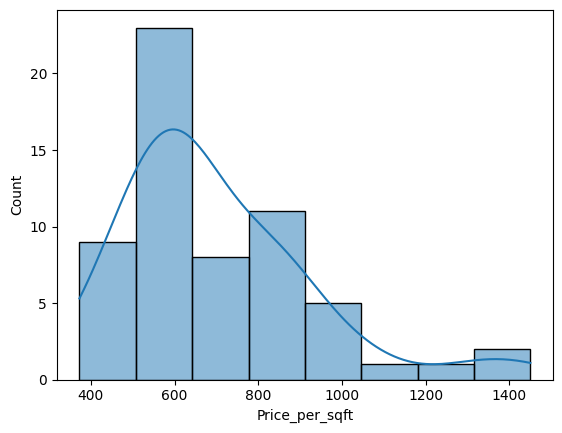

In [39]:
# Show the distribution of Price_per_sqft
sns.histplot(small_data['Price_per_sqft'], kde=True)

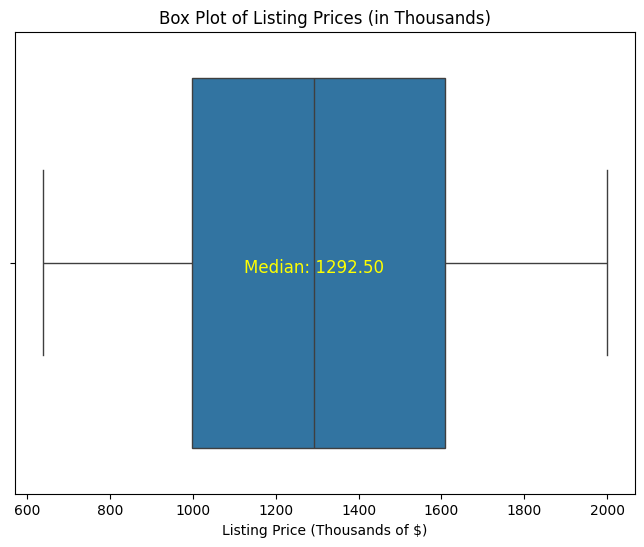

In [40]:
# Convert the listing price to thousands
small_data['Listing_Price_Thousands'] = small_data['Listing_Price'] / 1000

# Calculate the median of the listing price in thousands
median_price = small_data['Listing_Price_Thousands'].median()

# Create a box plot for the listing price in thousands
plt.figure(figsize=(8, 6))
sns.boxplot(x=small_data['Listing_Price_Thousands'])

# Annotate the median on the plot
plt.text(median_price, 0.02, f'Median: {median_price:.2f}', color='yellow', ha='center', fontsize=12)

# Set titles and labels
plt.title('Box Plot of Listing Prices (in Thousands)')
plt.xlabel('Listing Price (Thousands of $)')

# Show the plot
plt.show()

['93405' '93401' '00000']
['House for sale' 'Condo for sale' 'New construction' 'For Rent'
 'Multi-family home for sale']


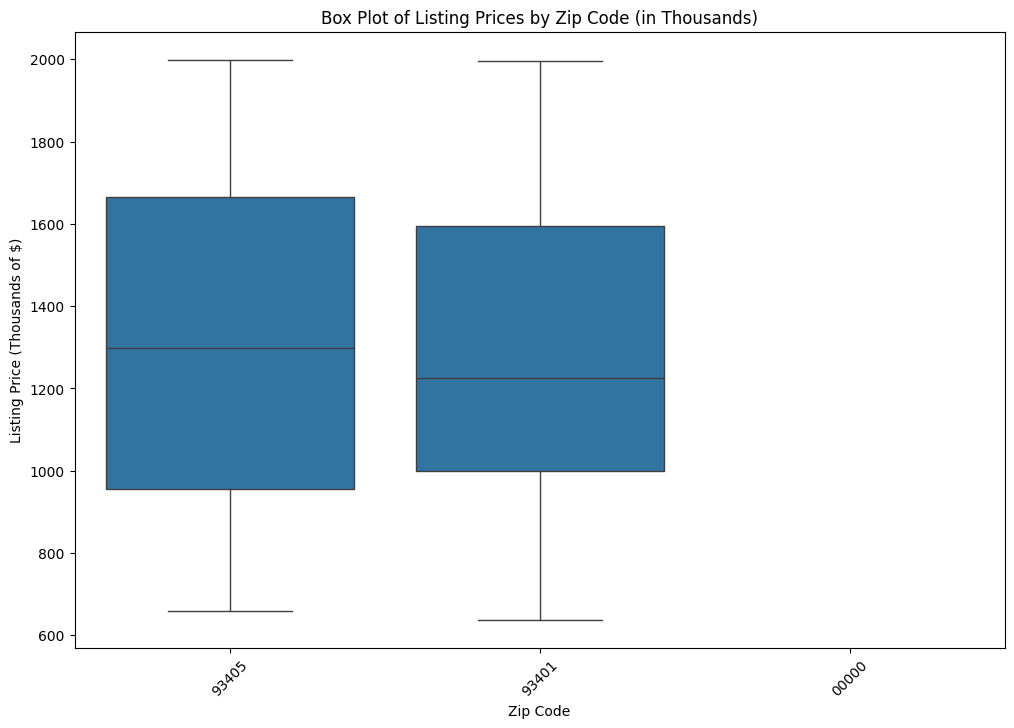

In [41]:
# Create a box plot of listing price (in thousands) for each unique zip code
plt.figure(figsize=(12, 8))
sns.boxplot(x='Zip_Code', y='Listing_Price_Thousands', data=small_data)

# Set titles and labels
plt.title('Box Plot of Listing Prices by Zip Code (in Thousands)')
plt.xlabel('Zip Code')
plt.ylabel('Listing Price (Thousands of $)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

['House for sale' 'Condo for sale' 'New construction' 'For Rent'
 'Multi-family home for sale']


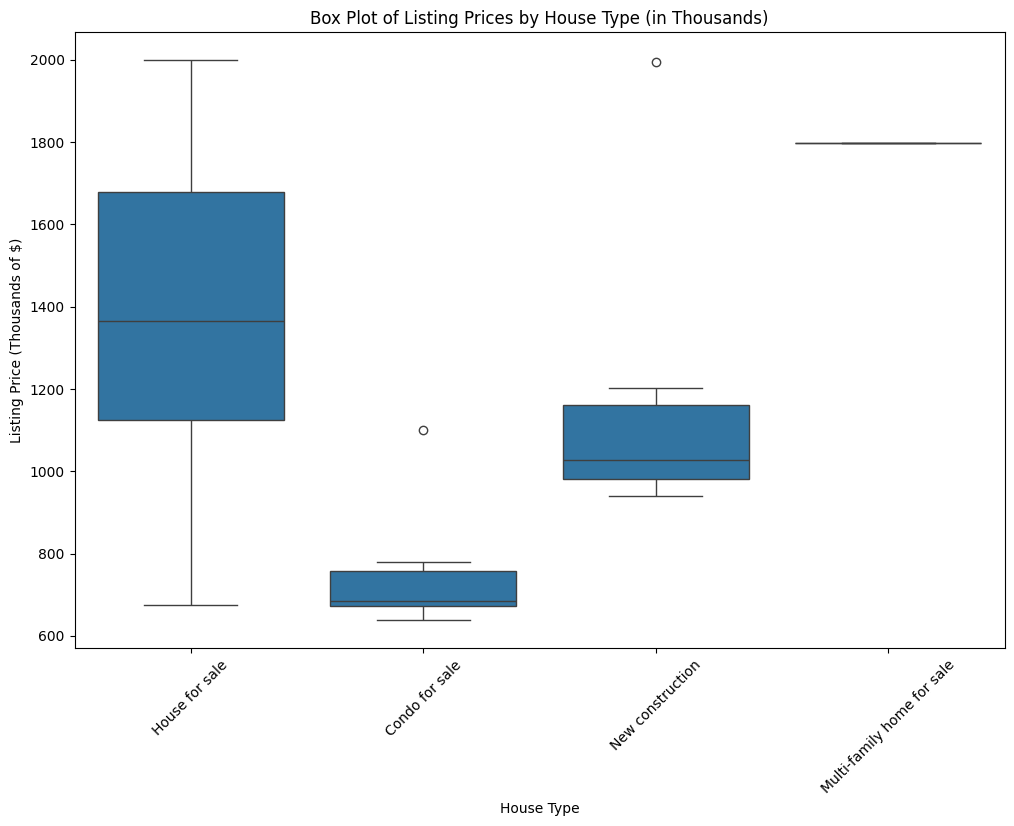

In [42]:
print(small_data['statusText'].unique())

# Filter out the 'For Rent' house type
filtered_data = small_data[small_data['statusText'] != 'For Rent']

# Create a box plot of listing price (in thousands) for each house type
plt.figure(figsize=(12, 8))
sns.boxplot(x='statusText', y='Listing_Price_Thousands', data=filtered_data)

# Set titles and labels
plt.title('Box Plot of Listing Prices by House Type (in Thousands)')
plt.xlabel('House Type')
plt.ylabel('Listing Price (Thousands of $)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

The housing market in San Luis Obispo is extremely expensive. The median listing price for all property types is nearly \$1.3M, with a median price of about \$600 per square foot. For a \$1M single-family home, a 20% down payment of \$200K is required, and the monthly mortgage payment for a 30-year fixed loan at a 5% interest rate is estimated as \$5325 (zillow.com/mortgage-calculator/). This amount is substantial, even before accounting for closing costs, property taxes, and insurance.

Among residential properties, condos tend to be the most affordable, followed by new constructions, with existing single-family homes being the most expensive. Notably, one condo and one new construction appear to be overpriced, possibly due to data entry errors.

There’s no significant price difference between the two zip codes analyzed, but more detailed cash flow analysis could further clarify the investment potential.